In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Amazon/Amazon_Book.csv")

In [ ]:
df.shape

(2222742, 11)

In [ ]:
df.head()

,Unnamed: 0,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
df.dtypes

Unnamed: 0             int64
asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
categoryName          object
dtype: object

In [ ]:
df.describe()

,Unnamed: 0,stars,reviews,price,boughtInLastMonth
count,2.222742e+06,2.002742e+06,2.222742e+06,1.892742e+06,2.222742e+06
mean,1.111370e+06,2.030760e+00,3.821617e+02,9.433956e+01,1.856902e+01
std,6.416505e+05,2.185456e+00,5.020752e+03,3.631555e+02,1.919030e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.556852e+05,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
50%,1.111370e+06,0.000000e+00,0.000000e+00,1.992000e+01,0.000000e+00
75%,1.667056e+06,4.400000e+00,4.400000e+01,4.788000e+01,0.000000e+00
max,2.222741e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


Checking duplicated values

In [ ]:
df.duplicated().sum()

0

Finding Correlation

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,stars,reviews,price,isBestSeller,boughtInLastMonth
Unnamed: 0,1.000000,-0.012203,0.006718,0.017684,-0.003746,-0.009835
stars,-0.012203,1.000000,0.083706,-0.121280,0.056749,0.106774
reviews,0.006718,0.083706,1.000000,-0.012646,0.061835,0.095229
price,0.017684,-0.121280,-0.012646,1.000000,-0.010208,-0.021374
isBestSeller,-0.003746,0.056749,0.061835,-0.010208,1.000000,0.222299
boughtInLastMonth,-0.009835,0.106774,0.095229,-0.021374,0.222299,1.000000


Finding Correlation with target column

In [ ]:
corr = df.corr()
print(corr['isBestSeller'].sort_values(ascending=False))

<ipython-input-9-a291619d9cd3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


isBestSeller         1.000000
boughtInLastMonth    0.222299
reviews              0.061835
stars                0.056749
Unnamed: 0          -0.003746
price               -0.010208
Name: isBestSeller, dtype: float64


<ipython-input-15-4d93f79f9580>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.show(sns.heatmap(df.corr(), cmap='RdYlGn', annot=True))


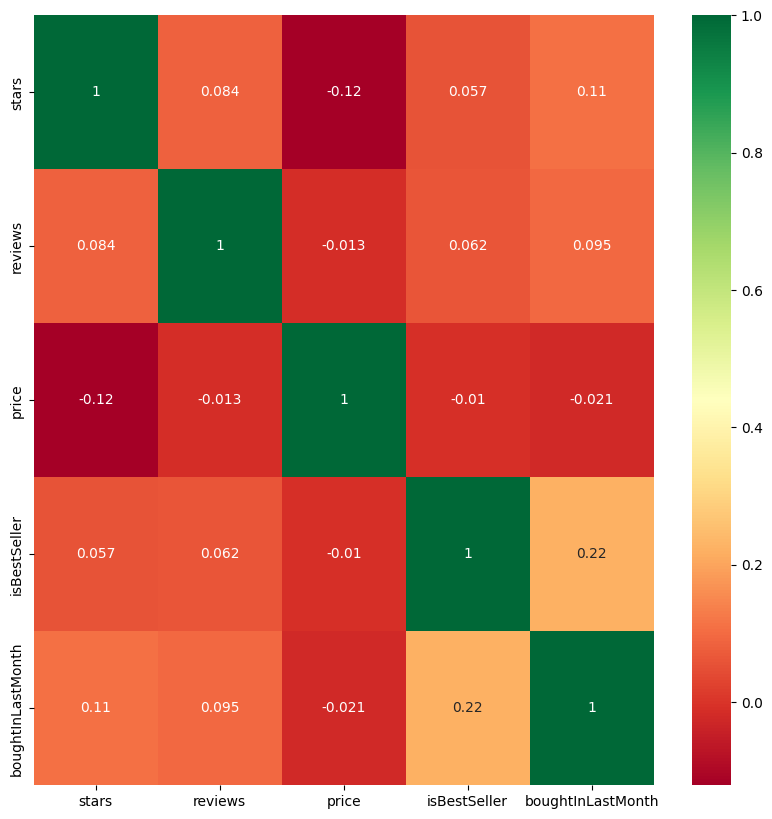

In [ ]:
plt.figure(figsize=(10,10))
plt.show(sns.heatmap(df.corr(), cmap='RdYlGn', annot=True))

In [ ]:
selected_cols = ['stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'categoryName', 'title']
df = df[selected_cols]
print(df.shape)

(2222742, 7)


In [ ]:
df.head()

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,title
0,4.7,15308,21.99,False,0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release) | Big ..."
1,4.7,98099,23.99,True,0,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth..."
2,4.7,15308,21.99,False,0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release) | Big ..."
3,4.7,7205,31.99,False,0,Hi-Fi Speakers,"Echo Dot with clock (5th generation, 2022 rele..."
4,4.6,1881,17.99,False,0,Hi-Fi Speakers,Introducing Echo Pop | Full sound compact Wi-F...


Checking null values

In [ ]:
df.isnull().sum()

stars                220000
reviews                   0
price                330000
isBestSeller              0
boughtInLastMonth         0
categoryName              0
title                     0
dtype: int64

Replacing null values with median

In [ ]:
df.stars.fillna(df.stars.median() , inplace = True)

In [ ]:
df.price.fillna(df.price.median(), inplace = True)

In [ ]:
df.isnull().sum()

stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
title                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   stars              float64
 1   reviews            int64  
 2   price              float64
 3   isBestSeller       bool   
 4   boughtInLastMonth  int64  
 5   categoryName       object 
 6   title              object 
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 103.9+ MB


Datatype Conversion

In [ ]:
df['isBestSeller'] = df['isBestSeller'].astype(int)

In [ ]:
df.head(3)

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,title
0,4.7,15308,21.99,0,0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release) | Big ..."
1,4.7,98099,23.99,1,0,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth..."
2,4.7,15308,21.99,0,0,Hi-Fi Speakers,"Echo Dot (5th generation, 2022 release) | Big ..."


Finding unique values for books bought a nd category name

In [ ]:
df['boughtInLastMonth'].unique()

array([    0,   600,  1000,   200,   100,    50,  2000,   800,   900,
         700,   500,   400,   300,  4000,  3000,  5000,  9000,  7000,
        6000, 50000, 20000, 10000,  8000, 30000, 40000])

In [ ]:
df['categoryName'].nunique()

296

Count of bestsellers and non bestsellers

In [ ]:
is_bestseller_count = df['isBestSeller'].value_counts()
is_bestseller_count

0    2216724
1       6018
Name: isBestSeller, dtype: int64

In [ ]:
import plotly.express as px

# Create a DataFrame for the pie chart
is_bestseller_data = pd.DataFrame({'isBestSeller': is_bestseller_count.index, 'Count': is_bestseller_count.values})

# Define custom labels
custom_labels = {0: "Not Bestseller", 1: "Bestseller"}

# Replace the values in the DataFrame with custom labels
is_bestseller_data['isBestSeller'] = is_bestseller_data['isBestSeller'].map(custom_labels)

# Create an interactive pie chart with custom labels
fig = px.pie(is_bestseller_data, names='isBestSeller', values='Count', title='isBestSeller Count')

# Show the interactive pie chart
fig.show()

Here we found the insight from the Amazon Product Dataset of UK 2023.

The bestSeller products are 0.271 % and NotBestSeller Products are 99.7%

We have Not BestSeller count is 2216724 and bestSeller count is 6018

sum of books bought is last month(best sellers and non best sellers)

In [ ]:
sum_bought_in_last_month = df.groupby('isBestSeller')['boughtInLastMonth'].sum()
sum_bought_in_last_month

isBestSeller
0    36235200
1     5038950
Name: boughtInLastMonth, dtype: int64

categoriwise product sales

In [ ]:
category_sales = df.groupby('categoryName')['boughtInLastMonth'].sum().reset_index()
category_sales

,categoryName,boughtInLastMonth
0,3D Printers,650
1,3D Printing & Scanning,2050
2,Abrasive & Finishing Products,4800
3,Action Cameras,0
4,Adapters,250
...,...,...
291,Wind Instruments,3750
292,Window Treatments,12450
293,Women,355600
294,Women's Sports & Outdoor Shoes,2000


In [ ]:
category_sales = category_sales.sort_values(by='boughtInLastMonth', ascending=False)

In [ ]:
category_sales

,categoryName,boughtInLastMonth
126,Health & Personal Care,8282750
109,Grocery,4320950
221,Pet Supplies,3231200
251,Skin Care,2095500
266,Storage & Organisation,1796900
...,...,...
138,Home Entertainment,0
133,Hockey Shoes,0
121,Handmade Kitchen & Dining,0
108,Graphics Cards,0


Top 10 product sold

In [ ]:
# Group the data by 'categoryName' and calculate total sales performance (boughtInLastMonth)
category_sales = df.groupby('categoryName')['boughtInLastMonth'].sum().reset_index()

# Sort the categories based on sales performance
category_sales = category_sales.sort_values(by='boughtInLastMonth', ascending=False)

top_10_category_sales = category_sales.nlargest(10, 'boughtInLastMonth')

fig = px.bar(top_10_category_sales, x='categoryName', y='boughtInLastMonth',
             labels={'categoryName': 'Category', 'boughtInLastMonth': 'Total Sales (in Last Month)'},
             text='boughtInLastMonth', title='Top 10 Product Categories by Sales', color="categoryName",
            )

fig.update_layout(width=2000, height=600)
fig.show()

Here we can see the top selling product category name and sold in last month.

The top product categeory Name is Healthh and Personal Care, Grocery, pet Supplies , Skin Care

**Sum of price of which products are sold**

In [ ]:
df['moneyVolume'] = df['price'] * df['boughtInLastMonth']

In [ ]:
category_money_volume = df.groupby('categoryName')['moneyVolume'].sum().reset_index()
category_money_volume

,categoryName,moneyVolume
0,3D Printers,107595.5
1,3D Printing & Scanning,41372.5
2,Abrasive & Finishing Products,63145.0
3,Action Cameras,0.0
4,Adapters,2197.5
...,...,...
291,Wind Instruments,36367.0
292,Window Treatments,167920.5
293,Women,4701669.0
294,Women's Sports & Outdoor Shoes,42822.0


In [ ]:
top_10_money_volume = category_money_volume.nlargest(10, 'moneyVolume')
top_10_money_volume

,categoryName,moneyVolume
126,Health & Personal Care,109077214.5
109,Grocery,52087991.0
221,Pet Supplies,50015485.5
266,Storage & Organisation,28111698.0
251,Skin Care,25134356.5
253,Small Kitchen Appliances,18320958.5
216,PC & Video Games,16658065.0
9,Baby,15303667.5
287,Vacuums & Floorcare,13431723.5
262,Sports & Outdoors,12945482.0


In [ ]:
df['moneyVolume'] = df['price'] * df['boughtInLastMonth']

category_money_volume = df.groupby('categoryName')['moneyVolume'].sum().reset_index()

top_10_money_volume = category_money_volume.nlargest(10, 'moneyVolume')

fig = px.bar(top_10_money_volume, x='categoryName', y='moneyVolume',
             labels={'categoryName': 'Category', 'moneyVolume': 'Money Volume (£)'},
             text='moneyVolume', title='Top 10 Categories by Amount of product sold', color="categoryName"
            )

fig.update_layout(width=2000, height=600)

fig.show()

**Top 10 Products by reviews**

In [ ]:
filtered_df = df[df['reviews'] >= 25000]
filtered_df.head(5)

,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName,title,moneyVolume
1,4.7,98099,23.99,1,0,Hi-Fi Speakers,"Anker Soundcore mini, Super-Portable Bluetooth...",0.0
7,4.7,103673,39.99,0,0,Hi-Fi Speakers,Anker Soundcore 2 Portable Bluetooth Speaker w...,0.0
8,4.7,29909,29.99,0,0,Hi-Fi Speakers,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",0.0
21,4.8,59668,19.92,0,0,Hi-Fi Speakers,JBL GO 3 - Wireless Bluetooth portable speaker...,0.0
29,4.7,29387,39.98,0,600,Hi-Fi Speakers,"Upgraded, Anker Soundcore Boost Bluetooth Spea...",23988.0


**Top rated products**

In [ ]:
top_rated_products = filtered_df.groupby('categoryName').apply(lambda x: x[x['stars'] == x['stars'].max()])
top_rated_products.head(5)

stars  reviews  price  isBestSeller  \
categoryName                                                  
Action Cameras 2049133    4.5    29686  59.99             0   
Adapters       1635155    4.6   143355  19.92             0   
               1635170    4.6    43174   5.79             0   
               1635179    4.6    80298   5.49             0   
               1635181    4.6    60632  19.92             0   

                        boughtInLastMonth    categoryName  \
categoryName                                                
Action Cameras 2049133                  0  Action Cameras   
Adapters       1635155                  0        Adapters   
               1635170                  0        Adapters   
               1635179                  0        Adapters   
               1635181                  0        Adapters   

                                                                    title  \
categoryName                                                                
Action Cameras 2049133  AKASO EK7000 4K30FPS Action Camera - 20MP Ultr...   
Adapters       1635155  USB C to USB Adapter(2 Pack), Syntech USB-C Ma...   
               1635170  Syntech USB C Female to USB Male Adapter Pack ...   
               1635179  BASESAILOR USB to USB C Adapter 2Pack,Type C F...   
               1635181  nonda USB C to USB Adapter(2 Pack),USB-C to US...   

                        moneyVolume  
categoryName                         
Action Cameras 2049133          0.0  
Adapters       1635155          0.0  
               1635170          0.0  
               1635179          0.0  
               1635181          0.0

In [ ]:
filtered_df = df[df['reviews'] >= 25000]

filtered_df = filtered_df[filtered_df['categoryName'].isin(top_10_category_sales['categoryName'])]

top_rated_products = filtered_df.groupby('categoryName').apply(lambda x: x[x['stars'] == x['stars'].max()])

top_rated_products = top_rated_products.reset_index(drop=True)

# Sort the top_rated_products DataFrame by 'reviews' in ascending order within each category
sorted_top_rated_products = top_rated_products.sort_values(by='stars', ascending=False).groupby('categoryName').head(1)

# Create an interactive bar chart
fig = px.bar(sorted_top_rated_products, x='categoryName', y='stars', text='title',
             title='Top Rated Products by Top 20 Categories (Minimum 25000 Reviews) - Highest Number of Reviews',
             labels={'categoryName': 'Category', 'stars': 'Rating'}, color="title",
             hover_data=["stars", "reviews", "price", "isBestSeller", "boughtInLastMonth"]
             )

fig.update_layout(width=2000, height=600)
fig.show()

**Count of product of each category**

In [ ]:
category_counts = df['categoryName'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts.head(10)

,Category,Count
0,Sports & Outdoors,826076
1,Skin Care,18755
2,Fragrances,18563
3,Make-up,18453
4,Manicure & Pedicure Products,17212
5,"Handmade Clothing, Shoes & Accessories",16707
6,Men,16384
7,Women,16284
8,Handmade Gifts,15790
9,Handmade Artwork,15297


In [ ]:

category_counts = df['categoryName'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

fig = px.pie(category_counts.head(20), names='Category', values='Count', title='Number of Products in Each Category')

fig.show()

**Model Creation**

In [ ]:
corr_matrix=df.corr()
corr_matrix

<ipython-input-43-381c0cdd9e51>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,stars,reviews,price,isBestSeller,boughtInLastMonth,moneyVolume
stars,1.000000,0.077520,-0.102160,0.051402,0.096435,0.075306
reviews,0.077520,1.000000,-0.011420,0.061835,0.095229,0.076339
price,-0.102160,-0.011420,1.000000,-0.009397,-0.019552,-0.010010
isBestSeller,0.051402,0.061835,-0.009397,1.000000,0.222299,0.158661
boughtInLastMonth,0.096435,0.095229,-0.019552,0.222299,1.000000,0.695766
moneyVolume,0.075306,0.076339,-0.010010,0.158661,0.695766,1.000000


In [ ]:
print(corr_matrix["isBestSeller"].sort_values(ascending=False))

isBestSeller         1.000000
boughtInLastMonth    0.222299
moneyVolume          0.158661
reviews              0.061835
stars                0.051402
price               -0.009397
Name: isBestSeller, dtype: float64


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
features=["boughtInLastMonth","moneyVolume","reviews","stars","price"]

**Random Forest**

In [ ]:
x = df[features]
y = df['isBestSeller']
model = RandomForestClassifier(random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

model = RandomForestClassifier(n_estimators=70, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluation
print(classification_report(y_test, y_pred))
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE score: {rmse}')
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Test ROC-AUC score: {roc_auc}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    886654
           1       0.25      0.04      0.07      2443

    accuracy                           1.00    889097
   macro avg       0.62      0.52      0.53    889097
weighted avg       1.00      1.00      1.00    889097

Test RMSE score: 0.05450164720613527
Test ROC-AUC score: 0.5205026943403012


Logistic Regression and Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd


#  Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train, y_train)

#  Gradient Boosting Classifier model
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)

# predictions on the test set for Logistic Regression
y_pred_lr = model_lr.predict(x_test)

#  predictions on the test set for Gradient Boosting Classifier
y_pred_gb = model_gb.predict(x_test)

# Evaluation of Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_lr}")
print(f"ROC-AUC score: {roc_auc_lr}")

# Evaluation of Gradient Boosting Classifier model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

print("\nGradient Boosting Classifier Model:")
print(f"Accuracy: {accuracy_gb}")
print(f"ROC-AUC score: {roc_auc_gb}")


Logistic Regression Model:
Accuracy: 0.9972072788458403
ROC-AUC score: 0.5187548710739756

Gradient Boosting Classifier Model:
Accuracy: 0.9971386699089075
ROC-AUC score: 0.5156589349471047
